## The Central Limit Theorem (Practically Explained)

This notebook provides a practical simulation of how the central limit theorem (CLT) works and shows how as the sample size increases, the closer the sampling distribution is to approximately normal.

Let's say we work for a bank and we are interested in how long our customer service calls are.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import norm

In [49]:
# Simulation parameters
shape, scale = 2, 100
N = 1000
s = np.random.gamma(shape, scale, N)

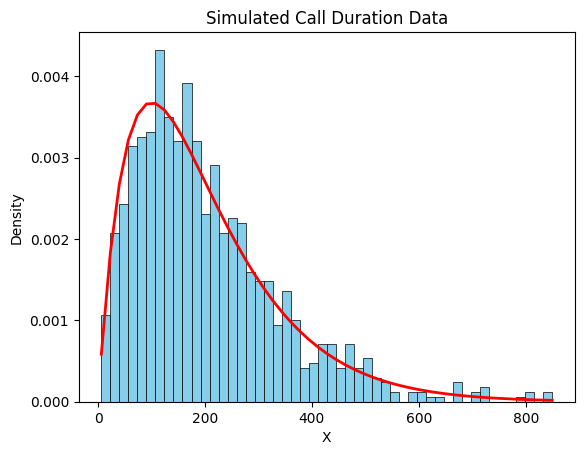

In [50]:
# Visualize simulated data
count, bins, ignored = plt.hist(s, 50, color='skyblue',
            edgecolor='black', linewidth=0.5, density=True)
y = gamma.pdf(bins, a = shape, scale = scale, loc = 0)
plt.plot(bins, y, linewidth=2, color='r')  
plt.title('Simulated Call Duration Data');
plt.xlabel('X');
plt.ylabel('Density')
plt.show()

Notice how the call duration data is not normally distributed!

In [33]:
def draw_sampling_distribution(seed, n_samples = 1000, r = 1000, a = 10, scale = 10, ax = None):
    """
    Draw the sampling distribution of the sample mean from a Gamma(a, scale) distribution.

    Parameters
    ----------
    seed : int
        Random seed for reproducibility.
    n_samples : int, default 1000
        Number of observations per replication (sample size).
    r : int, default 1000
        Number of replications to generate sample means.
    a : float, default 10
        Shape parameter of the Gamma distribution.
    scale : float, default 10
        Scale parameter of the Gamma distribution.
    ax : matplotlib.axes.Axes | None, default None
        If provided, the plot is drawn onto this Axes (useful for subplots).
        If None, a new Figure and Axes are created internally.

    Returns
    -------
    means : np.ndarray
        Array of length r containing the sample means.
    fig : matplotlib.figure.Figure | None
        The Figure created by this function if ax was None; otherwise None.
    ax : matplotlib.axes.Axes
        The Axes the plot was drawn on (either the passed-in ax or the new one).
    """
    # Set seed
    rng = np.random.default_rng(seed)

    # Theoretical parameters (for plotting)
    theoretical_mean = a * scale
    theoretical_var = a * (scale ** 2)
    theoretical_sd_sample_mean = np.sqrt(theoretical_var / n_samples)

    # Replicate r times: draw samples and store sample means
    means = np.empty(r, dtype=float)
    for i in range(r):
        samples = rng.gamma(shape=a, scale=scale, size=n_samples)
        means[i] = samples.mean()

    # Plot
    created_fig = None
    if ax is None:
        created_fig, ax = plt.subplots(figsize = (7, 5))
    ax.hist(means, bins=30, density=True, alpha=0.7, color='skyblue',
            edgecolor='black', linewidth=0.5)

    # Overlay normal with matching mean and SD of sample mean
    x = np.linspace(means.min(), means.max(), 200)

    ax.plot(x, norm.pdf(x, loc=theoretical_mean, scale=theoretical_sd_sample_mean),
            'r-', linewidth=2, label='Normal approx')

    # Vertical line at theoretical mean
    ax.axvline(theoretical_mean, color='red', linestyle='--', linewidth=1.5,
               label=f"Theoretical mean = {theoretical_mean:.2f}")

    # Labels and aesthetics
    ax.set_title(f"Distribution of sample mean call duration\n"
                 f"n={n_samples}, replications={r}")
    ax.set_xlabel('Sample mean')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()

    return means, created_fig, ax


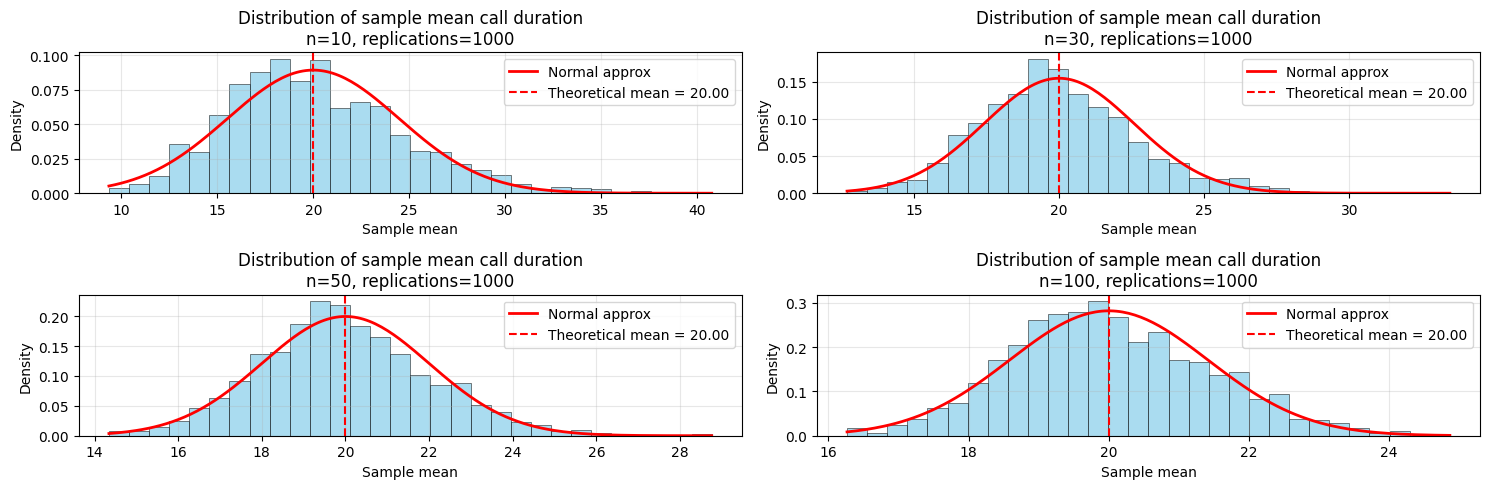

In [52]:
# Plot sampling distributions side by side at n = 1, 30, 100, 500 
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 5))

draw_sampling_distribution(seed = 42, n_samples = 10, a = shape, r = 1000, ax = axes[0, 0]);
draw_sampling_distribution(seed = 42, n_samples = 30, a = shape, r = 1000, ax = axes[0, 1]);
draw_sampling_distribution(seed = 42, n_samples = 50, a = shape, r = 1000, ax = axes[1, 0]);
draw_sampling_distribution(seed = 42, n_samples = 100, a = shape, r = 1000, ax = axes[1, 1]);

If the sample size is small (n = 10, 30, 50), then the distribution of the sample mean call time does not appear approximately normal. This is shown by the right skew in those plots.

The $n \ge 30$ rule isn't perfect!

Once the sample size gets larger, the sampling sampling distribution becomes approximately normal.

The result of the CLT allows us to estimate the average call duration with confidence intervals.